<a href="https://colab.research.google.com/github/anaswara21/test/blob/main/1_Initial_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing Libraries ##

In [ ]:
import os
import re
import nltk
import pandas as pd
from tqdm.notebook import tqdm, trange
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/context_and_emotion/dataset

/content/drive/MyDrive/context_and_emotion/dataset


In [ ]:
df = pd.read_csv('Dataset - EMPOLITICON NLP and ML Based Approach for Context and Emotion Classification of Political Speeches From Transcripts.csv')

In [ ]:
print(df)

     Country                 Date         Speaker  \
0     Russia           16/07/2021  Vladimir Putin   
1     Russia  2021-09-05 00:00:00  Vladimir Putin   
2     Russia  2021-08-04 00:00:00  Vladimir Putin   
3     Russia           21-11-2020  Vladimir Putin   
4     Russia           20-11-2020  Vladimir Putin   
...      ...                  ...             ...   
2005     USA           05/02/2013    Barack Obama   
2006     USA           04/02/2013    Barack Obama   
2007     USA           02/02/2013    Barack Obama   
2008     USA           28/01/2013    Barack Obama   
2009     USA           21/01/2013    Barack Obama   

                                               Headline  \
0                      Meeting of APEC Economic Leaders   
1                          Victory Parade on Red Square   
2     Meeting on the results of implementing Preside...   
3                                            G20 Summit   
4     Address to participants in Nuremberg Lessons f...   
...      

In [ ]:
# not yet... this will be updated accordingly
nltk_data_path = os.popen('which python').read().replace('bin/python\n', '').strip() + 'nltk_data/'
nltk.download('stopwords', download_dir=nltk_data_path)

[nltk_data] Downloading package stopwords to /usr/local/nltk_data/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# IMPORTANT -- TRAINING CONFIGURATION ONLY #

In [ ]:
## Data PreProcessing Configurations ##

In [ ]:
remove__slash__n = True
lower__case = True
remove__symbols = True
remove__digits = True
lemmatize__words = True
remove__stopwords = True
remove__special__characters = True
removing_classes_that_has_only_one_member = True

In [ ]:
# Dataset PreProcessing #

In [ ]:
CountryNames = [
    ('US', 'United States'),
    ('AF', 'Afghanistan'),
    ('AL', 'Albania'),
    ('DZ', 'Algeria'),
    ('AS', 'American Samoa'),
    ('AD', 'Andorra'),
    ('AO', 'Angola'),
    ('AI', 'Anguilla'),
    ('AQ', 'Antarctica'),
    ('AG', 'Antigua And Barbuda'),
    ('AR', 'Argentina'),
    ('AM', 'Armenia'),
    ('AW', 'Aruba'),
    ('AU', 'Australia'),
    ('AT', 'Austria'),
    ('AZ', 'Azerbaijan'),
    ('BS', 'Bahamas'),
    ('BH', 'Bahrain'),
    ('BD', 'Bangladesh'),
    ('BB', 'Barbados'),
    ('BY', 'Belarus'),
    ('BE', 'Belgium'),
    ('BZ', 'Belize'),
    ('BJ', 'Benin'),
    ('BM', 'Bermuda'),
    ('BT', 'Bhutan'),
    ('BO', 'Bolivia'),
    ('BA', 'Bosnia And Herzegowina'),
    ('BW', 'Botswana'),
    ('BV', 'Bouvet Island'),
    ('BR', 'Brazil'),
    ('BN', 'Brunei Darussalam'),
    ('BG', 'Bulgaria'),
    ('BF', 'Burkina Faso'),
    ('BI', 'Burundi'),
    ('KH', 'Cambodia'),
    ('CM', 'Cameroon'),
    ('CA', 'Canada'),
    ('CV', 'Cape Verde'),
    ('KY', 'Cayman Islands'),
    ('CF', 'Central African Rep'),
    ('TD', 'Chad'),
    ('CL', 'Chile'),
    ('CN', 'China'),
    ('CX', 'Christmas Island'),
    ('CC', 'Cocos Islands'),
    ('CO', 'Colombia'),
    ('KM', 'Comoros'),
    ('CG', 'Congo'),
    ('CK', 'Cook Islands'),
    ('CR', 'Costa Rica'),
    ('CI', 'Cote D`ivoire'),
    ('HR', 'Croatia'),
    ('CU', 'Cuba'),
    ('CY', 'Cyprus'),
    ('CZ', 'Czech Republic'),
    ('DK', 'Denmark'),
    ('DJ', 'Djibouti'),
    ('DM', 'Dominica'),
    ('DO', 'Dominican Republic'),
    ('TP', 'East Timor'),
    ('EC', 'Ecuador'),
    ('EG', 'Egypt'),
    ('SV', 'El Salvador'),
    ('GQ', 'Equatorial Guinea'),
    ('ER', 'Eritrea'),
    ('EE', 'Estonia'),
    ('ET', 'Ethiopia'),
    ('FK', 'Falkland Islands (Malvinas)'),
    ('FO', 'Faroe Islands'),
    ('FJ', 'Fiji'),
    ('FI', 'Finland'),
    ('FR', 'France'),
    ('GF', 'French Guiana'),
    ('PF', 'French Polynesia'),
    ('TF', 'French S. Territories'),
    ('GA', 'Gabon'),
    ('GM', 'Gambia'),
    ('GE', 'Georgia'),
    ('DE', 'Germany'),
    ('GH', 'Ghana'),
    ('GI', 'Gibraltar'),
    ('GR', 'Greece'),
    ('GL', 'Greenland'),
    ('GD', 'Grenada'),
    ('GP', 'Guadeloupe'),
    ('GU', 'Guam'),
    ('GT', 'Guatemala'),
    ('GN', 'Guinea'),
    ('GW', 'Guinea-bissau'),
    ('GY', 'Guyana'),
    ('HT', 'Haiti'),
    ('HN', 'Honduras'),
    ('HK', 'Hong Kong'),
    ('HU', 'Hungary'),
    ('IS', 'Iceland'),
    ('IN', 'India'),
    ('ID', 'Indonesia'),
    ('IR', 'Iran'),
    ('IQ', 'Iraq'),
    ('IE', 'Ireland'),
    ('IL', 'Israel'),
    ('IT', 'Italy'),
    ('JM', 'Jamaica'),
    ('JP', 'Japan'),
    ('JO', 'Jordan'),
    ('KZ', 'Kazakhstan'),
    ('KE', 'Kenya'),
    ('KI', 'Kiribati'),
    ('KP', 'Korea (North)'),
    ('KR', 'Korea (South)'),
    ('KW', 'Kuwait'),
    ('KG', 'Kyrgyzstan'),
    ('LA', 'Laos'),
    ('LV', 'Latvia'),
    ('LB', 'Lebanon'),
    ('LS', 'Lesotho'),
    ('LR', 'Liberia'),
    ('LY', 'Libya'),
    ('LI', 'Liechtenstein'),
    ('LT', 'Lithuania'),
    ('LU', 'Luxembourg'),
    ('MO', 'Macau'),
    ('MK', 'Macedonia'),
    ('MG', 'Madagascar'),
    ('MW', 'Malawi'),
    ('MY', 'Malaysia'),
    ('MV', 'Maldives'),
    ('ML', 'Mali'),
    ('MT', 'Malta'),
    ('MH', 'Marshall Islands'),
    ('MQ', 'Martinique'),
    ('MR', 'Mauritania'),
    ('MU', 'Mauritius'),
    ('YT', 'Mayotte'),
    ('MX', 'Mexico'),
    ('FM', 'Micronesia'),
    ('MD', 'Moldova'),
    ('MC', 'Monaco'),
    ('MN', 'Mongolia'),
    ('MS', 'Montserrat'),
    ('MA', 'Morocco'),
    ('MZ', 'Mozambique'),
    ('MM', 'Myanmar'),
    ('NA', 'Namibia'),
    ('NR', 'Nauru'),
    ('NP', 'Nepal'),
    ('NL', 'Netherlands'),
    ('AN', 'Netherlands Antilles'),
    ('NC', 'New Caledonia'),
    ('NZ', 'New Zealand'),
    ('NI', 'Nicaragua'),
    ('NE', 'Niger'),
    ('NG', 'Nigeria'),
    ('NU', 'Niue'),
    ('NF', 'Norfolk Island'),
    ('MP', 'Northern Mariana Islands'),
    ('NO', 'Norway'),
    ('OM', 'Oman'),
    ('PK', 'Pakistan'),
    ('PW', 'Palau'),
    ('PA', 'Panama'),
    ('PG', 'Papua New Guinea'),
    ('PY', 'Paraguay'),
    ('PE', 'Peru'),
    ('PH', 'Philippines'),
    ('PN', 'Pitcairn'),
    ('PL', 'Poland'),
    ('PT', 'Portugal'),
    ('PR', 'Puerto Rico'),
    ('QA', 'Qatar'),
    ('RE', 'Reunion'),
    ('RO', 'Romania'),
    ('RU', 'Russian Federation'),
    ('RW', 'Rwanda'),
    ('KN', 'Saint Kitts And Nevis'),
    ('LC', 'Saint Lucia'),
    ('VC', 'St Vincent/Grenadines'),
    ('WS', 'Samoa'),
    ('SM', 'San Marino'),
    ('ST', 'Sao Tome'),
    ('SA', 'Saudi Arabia'),
    ('SN', 'Senegal'),
    ('SC', 'Seychelles'),
    ('SL', 'Sierra Leone'),
    ('SG', 'Singapore'),
    ('SK', 'Slovakia'),
    ('SI', 'Slovenia'),
    ('SB', 'Solomon Islands'),
    ('SO', 'Somalia'),
    ('ZA', 'South Africa'),
    ('ES', 'Spain'),
    ('LK', 'Sri Lanka'),
    ('SH', 'St. Helena'),
    ('PM', 'St.Pierre'),
    ('SD', 'Sudan'),
    ('SR', 'Suriname'),
    ('SZ', 'Swaziland'),
    ('SE', 'Sweden'),
    ('CH', 'Switzerland'),
    ('SY', 'Syrian Arab Republic'),
    ('TW', 'Taiwan'),
    ('TJ', 'Tajikistan'),
    ('TZ', 'Tanzania'),
    ('TH', 'Thailand'),
    ('TG', 'Togo'),
    ('TK', 'Tokelau'),
    ('TO', 'Tonga'),
    ('TT', 'Trinidad And Tobago'),
    ('TN', 'Tunisia'),
    ('TR', 'Turkey'),
    ('TM', 'Turkmenistan'),
    ('TV', 'Tuvalu'),
    ('UG', 'Uganda'),
    ('UA', 'Ukraine'),
    ('AE', 'United Arab Emirates'),
    ('UK', 'United Kingdom'),
    ('UY', 'Uruguay'),
    ('UZ', 'Uzbekistan'),
    ('VU', 'Vanuatu'),
    ('VA', 'Vatican City State'),
    ('VE', 'Venezuela'),
    ('VN', 'Viet Nam'),
    ('VG', 'Virgin Islands (British)'),
    ('VI', 'Virgin Islands (U.S.)'),
    ('EH', 'Western Sahara'),
    ('YE', 'Yemen'),
    ('YU', 'Yugoslavia'),
    ('ZR', 'Zaire'),
    ('ZM', 'Zambia'),
    ('ZW', 'Zimbabwe'),
    ('Great Britain', "Britain"),
    ('USA', "America"),
    ('RU', 'Russia')
]

In [ ]:
CountryItems=[item for t in CountryNames for item in t]


In [ ]:
print(CountryItems)

['US', 'United States', 'AF', 'Afghanistan', 'AL', 'Albania', 'DZ', 'Algeria', 'AS', 'American Samoa', 'AD', 'Andorra', 'AO', 'Angola', 'AI', 'Anguilla', 'AQ', 'Antarctica', 'AG', 'Antigua And Barbuda', 'AR', 'Argentina', 'AM', 'Armenia', 'AW', 'Aruba', 'AU', 'Australia', 'AT', 'Austria', 'AZ', 'Azerbaijan', 'BS', 'Bahamas', 'BH', 'Bahrain', 'BD', 'Bangladesh', 'BB', 'Barbados', 'BY', 'Belarus', 'BE', 'Belgium', 'BZ', 'Belize', 'BJ', 'Benin', 'BM', 'Bermuda', 'BT', 'Bhutan', 'BO', 'Bolivia', 'BA', 'Bosnia And Herzegowina', 'BW', 'Botswana', 'BV', 'Bouvet Island', 'BR', 'Brazil', 'BN', 'Brunei Darussalam', 'BG', 'Bulgaria', 'BF', 'Burkina Faso', 'BI', 'Burundi', 'KH', 'Cambodia', 'CM', 'Cameroon', 'CA', 'Canada', 'CV', 'Cape Verde', 'KY', 'Cayman Islands', 'CF', 'Central African Rep', 'TD', 'Chad', 'CL', 'Chile', 'CN', 'China', 'CX', 'Christmas Island', 'CC', 'Cocos Islands', 'CO', 'Colombia', 'KM', 'Comoros', 'CG', 'Congo', 'CK', 'Cook Islands', 'CR', 'Costa Rica', 'CI', 'Cote D`ivoire

In [ ]:
for i in range(len(CountryItems)):
    CountryItems[i]=CountryItems[i].lower()

In [ ]:
print(CountryItems)

['us', 'united states', 'af', 'afghanistan', 'al', 'albania', 'dz', 'algeria', 'as', 'american samoa', 'ad', 'andorra', 'ao', 'angola', 'ai', 'anguilla', 'aq', 'antarctica', 'ag', 'antigua and barbuda', 'ar', 'argentina', 'am', 'armenia', 'aw', 'aruba', 'au', 'australia', 'at', 'austria', 'az', 'azerbaijan', 'bs', 'bahamas', 'bh', 'bahrain', 'bd', 'bangladesh', 'bb', 'barbados', 'by', 'belarus', 'be', 'belgium', 'bz', 'belize', 'bj', 'benin', 'bm', 'bermuda', 'bt', 'bhutan', 'bo', 'bolivia', 'ba', 'bosnia and herzegowina', 'bw', 'botswana', 'bv', 'bouvet island', 'br', 'brazil', 'bn', 'brunei darussalam', 'bg', 'bulgaria', 'bf', 'burkina faso', 'bi', 'burundi', 'kh', 'cambodia', 'cm', 'cameroon', 'ca', 'canada', 'cv', 'cape verde', 'ky', 'cayman islands', 'cf', 'central african rep', 'td', 'chad', 'cl', 'chile', 'cn', 'china', 'cx', 'christmas island', 'cc', 'cocos islands', 'co', 'colombia', 'km', 'comoros', 'cg', 'congo', 'ck', 'cook islands', 'cr', 'costa rica', 'ci', 'cote d`ivoire

In [ ]:
## Functions Pre-Processing the Dataset ##

In [ ]:
# Removing \n from speeches
def removing_slash_n():
    if not remove__slash__n:
        return
    for row_number in trange(df.shape[0], desc="Removing '\\n'"):
        df.iloc[row_number, 4] = df.iloc[row_number, 4].replace('\n', ' ')

# lowercasing all the words in the speeches
def lowering_letters():
    if not lower__case:
        return
    for row_number in trange(df.shape[0], desc='Lower Cases'):
        df.iloc[row_number, 4] = df.iloc[row_number, 4].lower()

# removing symbols using regex
def removing_symbols():
    if not remove__symbols:
        return
    for row_number in trange(df.shape[0], desc = 'Removing Symbols'):
        speech = df.iloc[row_number, 4]
        speech_tokens = word_tokenize(speech)
        clean = []
        for token in speech_tokens:
            res = re.sub(r'[^\w\s]'," ", token)
            if res != '':
                clean.append(res)
        df.iloc[row_number, 4] = ' '.join(clean)

#removing numerical values
def only_is_alpha():
    if not remove__digits:
        return
    for row_number in trange(df.shape[0], desc = 'Keeping only Alphabetical characters'):
        speech = df.iloc[row_number, 4]
        speech_tokens = word_tokenize(speech)
        df.iloc[row_number, 4] = ' '.join([word for word in speech_tokens if word.isalpha()])

#removing special characters
def removing_special_characters():
    if not remove__special__characters:
        return

    def contains_special_characters(word : str) -> bool:
        for char in word:
            if not ('a' <= char <= 'z'):
                return True
        return False

    for row_number in trange(df.shape[0], desc='Removing Special Characters'):
        speech = df.iloc[row_number, 4]
        speech_tokens = word_tokenize(speech)
        df.iloc[row_number, 4] = ' '.join([w for w in speech_tokens if not contains_special_characters(w)])

#lemmatizing the words
def lemmatizing_speeches():
    if not lemmatize__words:
        return
    lemmatizer = WordNetLemmatizer()
    for row_number in trange(df.shape[0], desc='Lemmatizing Speeches'):
        speech = df.iloc[row_number, 4]
        speech_tokens = word_tokenize(speech)
        df.iloc[row_number, 4] = ' '.join([lemmatizer.lemmatize(word) for word in speech_tokens])

#removing stopwords
def removing_stopwords():
    if not remove__stopwords:
        return
    stop_words = stopwords.words('english')
    stop_words.extend(CountryItems)

    for row_number in trange(df.shape[0], desc='Removing StopWords'):
        speech = df.iloc[row_number, 4]
        speech_tokens = word_tokenize(speech)
        df.iloc[row_number, 4] = ' '.join([w for w in speech_tokens if w not in stop_words and len(w) > 2 and w != 'must'])

#removing words whose POS is noun
def removing_nouns():
    for row_number in trange(df.shape[0], desc='Removing NOUN'):
        sentences = sent_tokenize(df.iloc[row_number, 4])
        for i in range(len(sentences)):
            sentence=sentences[i]
            tagged_sentence = nltk.tag.pos_tag(sentence.split())
            edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS' and tag != 'PRP' and  tag != 'WP' and tag != 'WDT' and tag != 'PRT' and tag!='TO']
            sentences[i]=' '.join(edited_sentence)
        df.iloc[row_number, 4] = ' '.join(sentences)

In [ ]:
## Data PreProcessing Shot Callers ##

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
removing_slash_n()
lowering_letters()
removing_symbols()
only_is_alpha()
removing_special_characters()
lemmatizing_speeches()
removing_stopwords()
removing_nouns()


Removing '\n':   0%|          | 0/2010 [00:00<?, ?it/s]

Lower Cases:   0%|          | 0/2010 [00:00<?, ?it/s]

Removing Symbols:   0%|          | 0/2010 [00:00<?, ?it/s]

Keeping only Alphabetical characters:   0%|          | 0/2010 [00:00<?, ?it/s]

Removing Special Characters:   0%|          | 0/2010 [00:00<?, ?it/s]

Lemmatizing Speeches:   0%|          | 0/2010 [00:00<?, ?it/s]

Removing StopWords:   0%|          | 0/2010 [00:00<?, ?it/s]

Removing NOUN:   0%|          | 0/2010 [00:00<?, ?it/s]

In [ ]:
print(df)

     Country                 Date         Speaker  \
0     Russia           16/07/2021  Vladimir Putin   
1     Russia  2021-09-05 00:00:00  Vladimir Putin   
2     Russia  2021-08-04 00:00:00  Vladimir Putin   
3     Russia           21-11-2020  Vladimir Putin   
4     Russia           20-11-2020  Vladimir Putin   
...      ...                  ...             ...   
2005     USA           05/02/2013    Barack Obama   
2006     USA           04/02/2013    Barack Obama   
2007     USA           02/02/2013    Barack Obama   
2008     USA           28/01/2013    Barack Obama   
2009     USA           21/01/2013    Barack Obama   

                                               Headline  \
0                      Meeting of APEC Economic Leaders   
1                          Victory Parade on Red Square   
2     Meeting on the results of implementing Preside...   
3                                            G20 Summit   
4     Address to participants in Nuremberg Lessons f...   
...      

In [ ]:
## Functions to Gather Insights on Dataset PreProcessing ##

In [ ]:
#unique characters
def find_unique_characters():
    unique_characters = []
    for speech in tqdm(df['Text_of_Speech'], desc='Finding Unique Characters'):
        for char in speech:
            if char.lower() not in unique_characters:
                unique_characters.append(char.lower())
    unique_characters.sort()
    print(unique_characters)
find_unique_characters()

def find_alpha_numeric_mix():
    mix = []
    for speech in tqdm(df['Text_of_Speech'], desc='Finding Alpha Numeric Mix'):
        words_splitted = speech.split()
        for word in words_splitted:
            letter = False
            num = False
            for char in word:
                if 'a' <= char <= 'z':
                    letter = True
                if '0' <= char <= '9':
                    num = True
            if letter and num:
                mix.append(word)
    print(mix)
find_alpha_numeric_mix()

def find_words_with_special_characters():
    words_with_special_characters = []
    for speech in tqdm(df['Text_of_Speech']):
        words = speech.split()
        for word in words:
            for char in word:
                if not ('a' <= char <= 'z'):
                    words_with_special_characters.append(word)
    print(words_with_special_characters)
find_words_with_special_characters()

Finding Unique Characters:   0%|          | 0/2010 [00:00<?, ?it/s]

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Finding Alpha Numeric Mix:   0%|          | 0/2010 [00:00<?, ?it/s]

[]


  0%|          | 0/2010 [00:00<?, ?it/s]

[]


In [ ]:
print(df)

     Country                 Date         Speaker  \
0     Russia           16/07/2021  Vladimir Putin   
1     Russia  2021-09-05 00:00:00  Vladimir Putin   
2     Russia  2021-08-04 00:00:00  Vladimir Putin   
3     Russia           21-11-2020  Vladimir Putin   
4     Russia           20-11-2020  Vladimir Putin   
...      ...                  ...             ...   
2005     USA           05/02/2013    Barack Obama   
2006     USA           04/02/2013    Barack Obama   
2007     USA           02/02/2013    Barack Obama   
2008     USA           28/01/2013    Barack Obama   
2009     USA           21/01/2013    Barack Obama   

                                               Headline  \
0                      Meeting of APEC Economic Leaders   
1                          Victory Parade on Red Square   
2     Meeting on the results of implementing Preside...   
3                                            G20 Summit   
4     Address to participants in Nuremberg Lessons f...   
...      

(array([658., 491., 302., 224., 129.,  98.,  56.,  24.,  18.,  10.]),
 array([  32. ,  302.4,  572.8,  843.2, 1113.6, 1384. , 1654.4, 1924.8,
        2195.2, 2465.6, 2736. ]),
 <BarContainer object of 10 artists>)

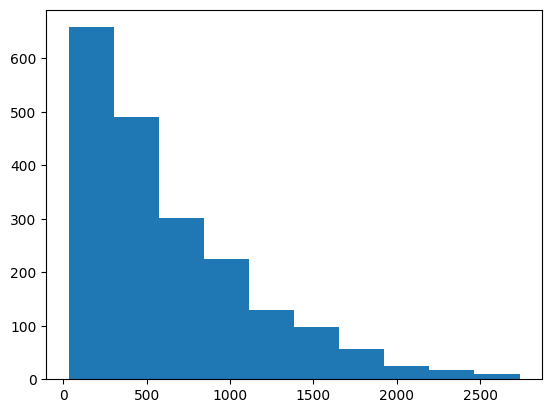

In [ ]:
pre_processed_speech_lengths = [len(word_tokenize(speech)) for speech in df['Text_of_Speech']]
plt.hist(pre_processed_speech_lengths)

In [ ]:
print(df)

     Country                 Date         Speaker  \
0     Russia           16/07/2021  Vladimir Putin   
1     Russia  2021-09-05 00:00:00  Vladimir Putin   
2     Russia  2021-08-04 00:00:00  Vladimir Putin   
3     Russia           21-11-2020  Vladimir Putin   
4     Russia           20-11-2020  Vladimir Putin   
...      ...                  ...             ...   
2005     USA           05/02/2013    Barack Obama   
2006     USA           04/02/2013    Barack Obama   
2007     USA           02/02/2013    Barack Obama   
2008     USA           28/01/2013    Barack Obama   
2009     USA           21/01/2013    Barack Obama   

                                               Headline  \
0                      Meeting of APEC Economic Leaders   
1                          Victory Parade on Red Square   
2     Meeting on the results of implementing Preside...   
3                                            G20 Summit   
4     Address to participants in Nuremberg Lessons f...   
...      

In [ ]:
pre_processed_speech_lengths.sort(reverse = True)
pre_processed_speech_lengths[:10]

[2736, 2726, 2702, 2644, 2636, 2617, 2590, 2510, 2491, 2490]

In [ ]:
print(df)

     Country                 Date         Speaker  \
0     Russia           16/07/2021  Vladimir Putin   
1     Russia  2021-09-05 00:00:00  Vladimir Putin   
2     Russia  2021-08-04 00:00:00  Vladimir Putin   
3     Russia           21-11-2020  Vladimir Putin   
4     Russia           20-11-2020  Vladimir Putin   
...      ...                  ...             ...   
2005     USA           05/02/2013    Barack Obama   
2006     USA           04/02/2013    Barack Obama   
2007     USA           02/02/2013    Barack Obama   
2008     USA           28/01/2013    Barack Obama   
2009     USA           21/01/2013    Barack Obama   

                                               Headline  \
0                      Meeting of APEC Economic Leaders   
1                          Victory Parade on Red Square   
2     Meeting on the results of implementing Preside...   
3                                            G20 Summit   
4     Address to participants in Nuremberg Lessons f...   
...      

In [ ]:
data = {}
for column_name in list(df):
    data[column_name] = list(df[column_name])
df_final = pd.DataFrame(data = data)

In [ ]:
df_final.to_csv('Dataset_PreProcessed.csv', index=False)